# Desafio Cientista de Dados - PProductions 🎬
Este notebook contém a análise exploratória e modelagem dos dados de filmes, com o objetivo de:

- Entender os principais fatores que influenciam o sucesso de um filme.
- Responder perguntas de negócio levantadas no desafio.
- Desenvolver um modelo simples para prever a nota do IMDB.
- Salvar o modelo em formato `.pkl`.

---

In [37]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações visuais
plt.style.use("seaborn-v0_8")
sns.set_palette("pastel")
sns.set_style("whitegrid")


# Explicação das Bibliotecas e Configurações Visuais
## Bibliotecas

- **pandas** → usado para **manipulação e análise de dados** (tabelas, séries temporais etc.).  
- **numpy** → usado para **cálculos numéricos** e **matrizes**.  
- **matplotlib** → usado para **visualização de dados** (gráficos).  
- **seaborn** → biblioteca de **gráficos mais estilizados**, construída sobre o matplotlib.  
---
## Configurações Visuais

- `plt.style.use("seaborn-v0_8")` → define o **estilo visual** dos gráficos para o estilo *Seaborn* (versão 0.8), deixando-os mais modernos e limpos.  
- `sns.set_palette("pastel")` → aplica a **paleta de cores pastel**, deixando os gráficos com cores mais suaves e agradáveis.  


In [38]:
#Carregar o dataset
dados_imdb = pd.read_csv("desafio_indicium_imdb.csv", sep=",")

In [39]:
# Visão geral inicial
print("Dimensões:", dados_imdb.shape)
dados_imdb.head()

Dimensões: (999, 16)


,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


In [40]:
#Info e estatísticas descritivas:

dados_imdb.info()

#df.describe(include="all") → estatísticas de todas as colunas.
#.T → deixa a saída mais legível, pois cada coluna do seu DataFrame fica em uma linha.
dados_imdb.describe(include ='all').T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,999.0,NaN,NaN,NaN,500.0,288.530761,1.0,250.5,500.0,749.5,999.0
Series_Title,999,998,Drishyam,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Released_Year,999,100,2014,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Certificate,898,16,U,234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Runtime,999,140,100 min,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Genre,999,202,Drama,84,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IMDB_Rating,999.0,NaN,NaN,NaN,7.947948,0.27229,7.6,7.7,7.9,8.1,9.2
Overview,999,999,An organized crime dynasty's aging patriarch t...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Meta_score,842.0,NaN,NaN,NaN,77.969121,12.383257,28.0,70.0,79.0,87.0,100.0
Director,999,548,Alfred Hitchcock,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
#Tratamento inicial de colunas:

# Converter Gross(renda bruta) para número:

dados_imdb['Gross'] = dados_imdb['Gross'].astype(str).str.replace(',', '').replace('$', '')
dados_imdb['Gross'] = pd.to_numeric(dados_imdb['Gross'], errors= "coerce")

In [42]:
# Converter 'Runtime' (tempo de filme) para numérico (minutos):

dados_imdb['Runtime'] = dados_imdb['Runtime'].str.replace(' min', '', regex=False).astype(int)

In [43]:
# Converter 'Released_Year' para numérico, tratando erros

dados_imdb['Released_Year'] = pd.to_numeric(dados_imdb['Released_Year'],errors = 'coerce')

In [44]:
# Contagem de valores nulos
dados_imdb.isna().sum()

Unnamed: 0         0
Series_Title       0
Released_Year      1
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [45]:
# Preencher valores ausentes em 'Meta_score' com a mediana
dados_imdb['Meta_score'].fillna(dados_imdb['Meta_score'].median(), inplace = True)

C:\Users\lampe\AppData\Local\Temp\ipykernel_28976\2598326600.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados_imdb['Meta_score'].fillna(dados_imdb['Meta_score'].median(), inplace = True)


In [46]:
# 1. Distribuição da Nota IMDB

plt.figure(figsize=(10, 6))
sns.histplot(dados_imdb["IMDB_Rating"], bins=20, kde=True)
plt.title("Distribuição da Nota IMDB")
plt.xlabel("Nota IMDB")
plt.ylabel("Frequência")
plt.savefig("distribuicao_imdb_rating.png")
plt.close()

In [47]:
# 2. Distribuição do Faturamento (Gross)

plt.figure(figsize=(10, 6))
sns.histplot(dados_imdb["Gross"].dropna(), bins=30, kde=True)
plt.title("Distribuição do Faturamento (Gross)")
plt.xlabel("Faturamento (em centenas de milhões)")
plt.ylabel("Frequência")
plt.savefig("distribuicao_faturamento.png")
plt.close()

In [48]:
# 3. Distribuição do Número de Votos

plt.figure(figsize=(10, 6))
sns.histplot(dados_imdb["No_of_Votes"].dropna(), bins=30, kde=True)
plt.title("Distribuição do Número de Votos")
plt.xlabel("Número de Votos")
plt.ylabel("Frequência")
plt.savefig("distribuicao_votos.png", dpi=300, bbox_inches='tight')
plt.close()


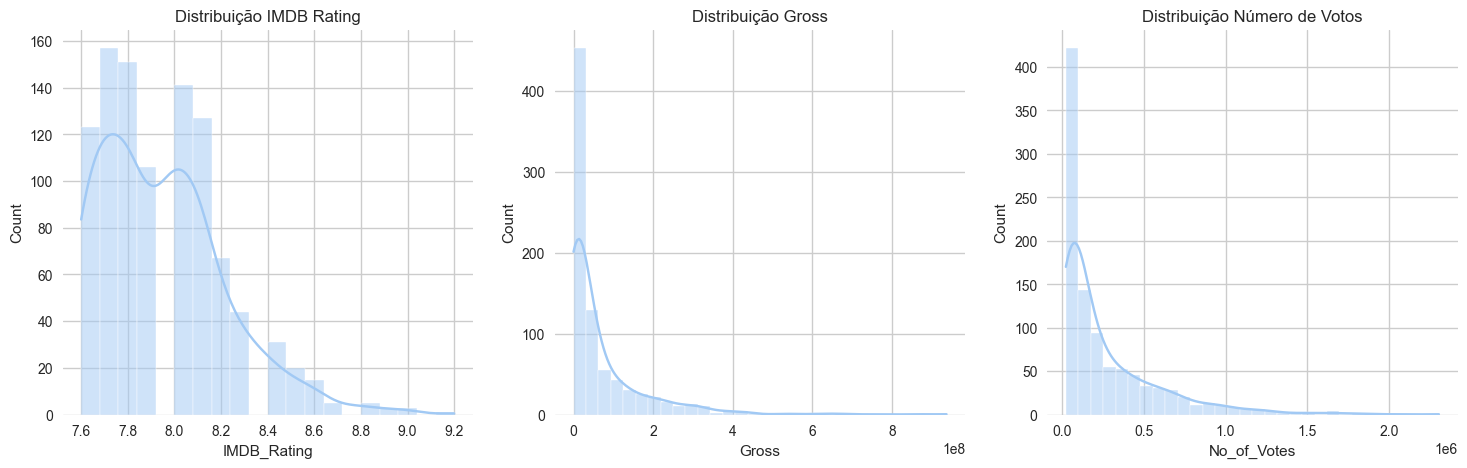

In [49]:
# Distribuições básicas juntas

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(dados_imdb["IMDB_Rating"], bins=20, kde=True, ax=axes[0])
axes[0].set_title("Distribuição IMDB Rating")

sns.histplot(dados_imdb["Gross"].dropna(), bins=30, kde=True, ax=axes[1])
axes[1].set_title("Distribuição Gross")

sns.histplot(dados_imdb["No_of_Votes"], bins=30, kde=True, ax=axes[2])
axes[2].set_title("Distribuição Número de Votos")

plt.savefig("distribuicoes_juntas.png", dpi=300, bbox_inches='tight')


plt.show()
plt.close()

In [50]:
# Relação entre Nota IMDB e Faturamento

plt.figure(figsize=(10, 6))
sns.scatterplot(x="IMDB_Rating", y="Gross", data=dados_imdb)
plt.title("Relação entre Nota IMDB e Faturamento")
plt.xlabel("Nota IMDB")
plt.ylabel("Faturamento")
plt.savefig("relacao_imdb_faturamento.png")
plt.close()


In [51]:
#Top 10 Gêneros mais comuns
plt.figure(figsize=(12, 8))
generos = dados_imdb["Genre"].str.split(", ", expand=True).stack()
sns.countplot(y=generos, order=generos.value_counts().index[:10], palette="viridis")
plt.title("Top 10 Gêneros Mais Comuns")
plt.xlabel("Contagem")
plt.ylabel("Gênero")
plt.savefig("top_10_generos.png")
plt.close()


C:\Users\lampe\AppData\Local\Temp\ipykernel_28976\2191948428.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=generos, order=generos.value_counts().index[:10], palette="viridis")


In [52]:
# Separar os gêneros e contar
generos = dados_imdb["Genre"].str.split(", ", expand=True).stack()
top10_generos = generos.value_counts().head(10)
top10_generos

Drama        723
Comedy       233
Crime        209
Adventure    196
Action       189
Thriller     137
Romance      125
Biography    109
Mystery       99
Animation     82
Name: count, dtype: int64

In [53]:
# Faturamento por Ano de Lançamento
plt.figure(figsize=(15, 7))
faturamento_por_ano = dados_imdb.groupby("Released_Year")["Gross"].sum().reset_index()
sns.lineplot(x="Released_Year", y="Gross", data=faturamento_por_ano)
plt.title("Faturamento Total por Ano de Lançamento")
plt.xlabel("Ano de Lançamento")
plt.ylabel("Faturamento Total")
plt.savefig("faturamento_por_ano.png")
plt.close()

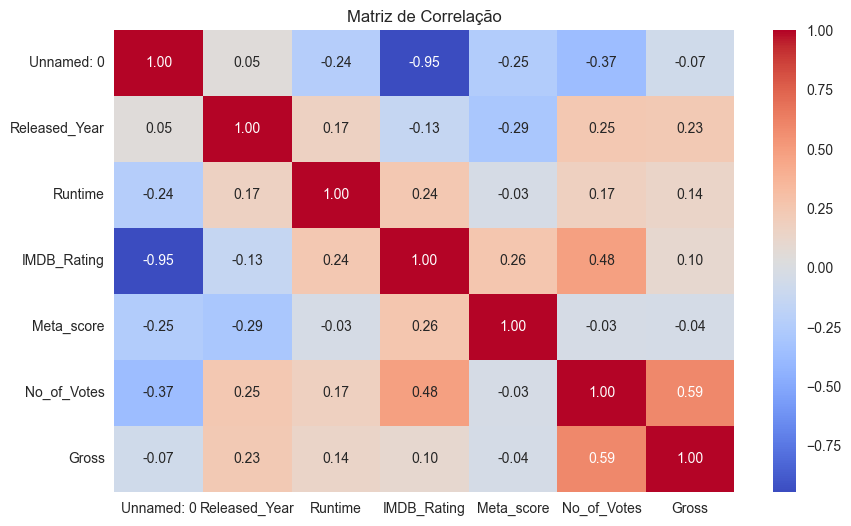

In [54]:
plt.figure(figsize=(10,6))
corr = dados_imdb.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()
